In [14]:
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats import weightstats as stests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'

# LAX Weather in 2019

In [2]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('laxweather.csv')

We are cleaning and organizing the data to have a column in datetime to have a legible dataset for visuals and models. 

## Cleaning the dataset

In [3]:
df['date']= pd.date_range(start='1/1/2019', end='12/31/2019')

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

In [6]:
df['season'] = df.date.map(season_of_date)

In [7]:
df['month'] = df['date'].dt.month

In [8]:
df['date'] = pd.to_datetime(df['date'])

Unlike the JFK and EWR dataset there is no column for 'PrecipAccumulation' as it does not snow in Los Angeles.

In [9]:
df['icon'].value_counts()

partly-cloudy-day    162
clear-day            134
rain                  62
cloudy                 7
Name: icon, dtype: int64

In [10]:
df.to_csv('cleanLAXweather.csv')

# Visuals

### Precipitaion

In [11]:
rain = df.groupby('season').agg({'precipProbability': ['mean']})
rain

,precipProbability
,mean
season,
1,0.377111
2,0.156854
3,0.065532
4,0.158043


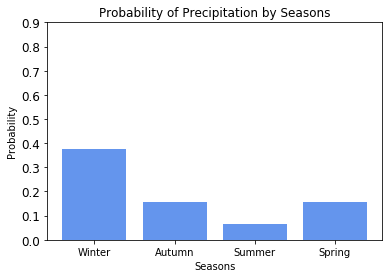

In [12]:
avgrain(rain)

 Los Angeles climate is categorized as a Mediterranean climate indicated seasons changes in rainfall. According to the visual we can see there is a higher chance of rain in the Winter season. This is because winter is wet season in Southern California and therefore summers are dry and wet winters..

#### ANOVA

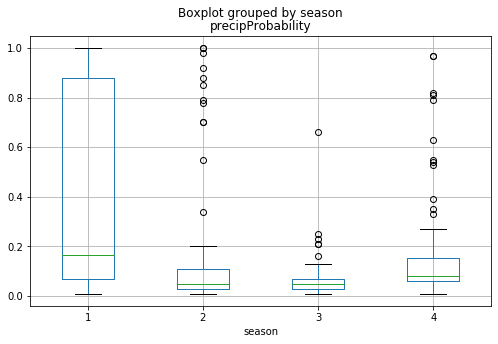

In [17]:
df.boxplot('precipProbability', by='season', figsize=(8, 5))

- Ha : There is no statistically significant difference in chance of precipitaton from the four seasons.
- Ho : There statistically significant difference in chance of precipitaton from the four seasons.

In [15]:
anova(df)

             df     sum_sq   mean_sq          F        PR(>F)
season      3.0   4.797420  1.599140  24.037164  3.326364e-14
Residual  361.0  24.016539  0.066528        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.2203  0.001 -0.3198 -0.1207   True
     1      3  -0.3116  0.001 -0.4098 -0.2134   True
     1      4  -0.2191  0.001 -0.3178 -0.1204   True
     2      3  -0.0913 0.0802 -0.1898  0.0071  False
     2      4   0.0012    0.9 -0.0978  0.1002  False
     3      4   0.0925 0.0707 -0.0051  0.1901  False
----------------------------------------------------


According to the results we can see the pvalue for the ANOVA test is less than our alpha of 0.05 therefore we can conclude there is a significant difference between the probability of precipitaion in seasons. We conduct a Tukey multiple pairwise- comparison to identify where the difference occurs. 


Looking at each season we can see there was no statistically signifance difference in comparing autumn with spring and summmer, along with comparing spring and summer. Therefore we can assume there is not enough evidence to compare autumn with spring and summer. When comparing winter with the other seasons there is statistical significance therefore thee result is not attributed by chance.

### Temperature

In [16]:
df['avgtemp']= df[['temperatureMax','temperatureMin']].mean(axis=1)

In [17]:
temp = df.groupby('season').agg({'avgtemp': ['mean']})
temp

,avgtemp
,mean
season,
1,57.080889
2,65.383820
3,70.158085
4,62.578913


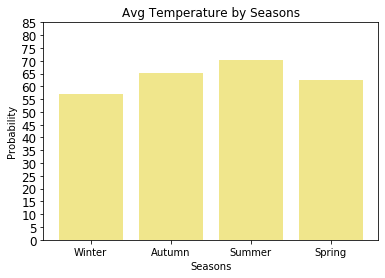

In [18]:
avgtemp(temp)

Interesting enough because of Los Angeles climate we can see the average temperate never reaches freezing due to is Mediterranean climate.

# Analysis of Weather Delays

Based on our LAX notebook, I have identified the dates with the longest delays due to weather. As we can see from the chance of precipitation visual, it mainly only rains in the winter. With the information I have deicided to only idenfity the top 3 flight dates since there are very few delays due to weather. 

In [28]:
airport= pd.read_csv('final1.csv')
airport.drop(['Unnamed: 0'],axis=1,inplace=True)
LAX = airport[airport['ORIGIN_STATE_ABR'] == 'CA']

In [29]:
LAX[LAX['WEATHER_DELAY'] > 0].groupby(['FL_DATE']).size().nlargest(3)

FL_DATE
2019-01-31    2
2019-12-03    2
2019-01-06    1
dtype: int64

### 2019-01-31

In [34]:
LAX[(LAX['FL_DATE'] =='2019-01-31')].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    13
AS     8
B6    10
DL    10
UA     8
dtype: int64

There were a total of 49 flights traveling form LAX to JFK and EWR. Out of all the flights only two flights were delayed because of weather conditions. It is also the most flights delayed in 2019 because of weather indicating LAX has few delays because of weather.

In [33]:
LAX[(LAX['FL_DATE'] =='2019-01-31') & (LAX['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
DL    2
dtype: int64

In [36]:
LAX[(LAX['FL_DATE'] =='2019-01-31') & (LAX['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).agg({'WEATHER_DELAY': ['sum']})

,WEATHER_DELAY
,sum
OP_UNIQUE_CARRIER,
DL,52.0


Delta Airlines had a total of 52 minutes of delays due to weather. It is also important to note, Delta travels to JFK and not EWR therefore we know the delays was only to the New York airport. 

In [38]:
df[df['date']== '2019-01-31']

,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,season,month,avgtemp
30,2019-01-31,1548835200,Partly cloudy throughout the day.,partly-cloudy-day,1548859980,1548897780,0.86,0.0001,0.0006,1548889200,0.16,rain,64.15,1548888480,55.5,1548926460,63.65,1548888480,55.99,1548926460,53.48,0.83,1013.1,4.8,9.95,1548899700,188,0.45,4,1548878820,9.468,264.3,54.65,1548862320,64.15,1548888480,55.14,1548862320,63.65,1548888480,1,1,59.4


As we can see in Los Angeles there was not indication for a weather delay therefore lets look into JFK weather to see if the delay was because of the destination.

In [44]:
JFK = pd.read_csv('cleanjfkweather.csv')

In [45]:
JFK[JFK['date']== '2019-01-31']

,Unnamed: 0,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,precipAccumulation,season,month,avgtemp
30,30,2019-01-31,1548824400,Windy in the afternoon and evening.,rain,1548850080,1548886260,0.85,0.0007,0.0101,1548824400,0.8,rain,34.44,1548878160,3.29,1548932580,21.85,1548878100,-15.53,1548923520,7.07,0.5,1014.3,18.24,41.89,1548889380,270,0.26,2,1548868080,9.621,352.4,6.9,1548907200,36.22,1548826560,-10.91,1548907200,27.25,1548827040,0.0,1,1,21.56


In New York on this date it rained therefore we can assume the delay in LAX was because of the weather condition in New York. There was an 80% chance of precipitation on this day with high windgust of 41.89 mph. 

### 2019-12-03

In [47]:
LAX[(LAX['FL_DATE'] =='2019-12-03')].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    11
AS     7
B6    12
DL    10
UA    12
dtype: int64

On this date there were a total of 52 flights to the east coast but only two flights were delayed.

In [48]:
LAX[(LAX['FL_DATE'] =='2019-12-03') & (LAX['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
B6    2
dtype: int64

In [51]:
LAX[(LAX['FL_DATE'] =='2019-12-03') & (LAX['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).agg({'WEATHER_DELAY': ['sum']})

,WEATHER_DELAY
,sum
OP_UNIQUE_CARRIER,
B6,148.0


JetBlue was the only airline to have delays on this date. In addition, JetBlue flies to JFK specifically and not EWR we can conclude the flight was headed to JFK. The two flights were delayed by a totoalof 148 minutes, a bit over 2 hours.

In [52]:
df[df['date']== '2019-12-03']

,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,season,month,avgtemp
336,2019-12-03,1575273600,Partly cloudy throughout the day.,partly-cloudy-day,1575297780,1575333960,0.22,0.0001,0.0005,1575337860,0.1,rain,67.06,1575322860,54.01,1575374640,66.56,1575322860,54.5,1575374640,42.23,0.54,1019.6,4.78,9.17,1575328500,289,0.41,3,1575315900,10.0,300.0,52.37,1575294780,67.06,1575322860,52.86,1575294780,66.56,1575322860,2,12,59.715


According to the LAX weather data on this date there was only a 10% chance of rain in Los Angeles with partly cloudy skys and good visibility. Therefore I decided to look into JFK weather in this date.

In [53]:
JFK[JFK['date']== '2019-12-03']

,Unnamed: 0,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,precipAccumulation,season,month,avgtemp
336,336,2019-12-03,1575262800,Light rain (with a chance of 1–2 in. of snow) ...,rain,1575288120,1575322200,0.21,0.015,0.0429,1575318900,1.0,rain,38.34,1575288000,31.04,1575377640,29.26,1575292860,20.26,1575352260,34.81,0.95,998.9,16.56,29.24,1575323280,7,1.0,1,1575305280,6.229,399.5,31.85,1575345600,39.98,1575262800,20.68,1575339660,30.18,1575262800,0.0,2,12,35.915


In JFK it seems the delay was in the destination. On this date there was a 100% chance of precipiation with high cloud coverage and low visibility therefore we can conclude the delay in LAX was because of weather in New York.

### 2019-01-06  

In [56]:
LAX[(LAX['FL_DATE'] =='2019-01-06')].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AA    12
AS     7
B6    10
DL     9
UA    11
dtype: int64

In LAX, on January 6,2019 there were a toal of 49 flights. On this date only one flight was delayed yet it is still part of the top 3 delayed flights in LAX.

In [57]:
LAX[(LAX['FL_DATE'] =='2019-01-06') & (LAX['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).size()

OP_UNIQUE_CARRIER
AS    1
dtype: int64

In [61]:
LAX[(LAX['FL_DATE'] =='2019-01-06') & (LAX['WEATHER_DELAY'] > 0)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
26034,1,1,6,7,2019-01-06,AS,1156,12892,LAX,"Los Angeles, CA",CA,California,11618,EWR,"Newark, NJ",NJ,New Jersey,644.0,24.0,1456.0,25.0,0.0,278.0,2454.0,0.0,24.0,1.0,0.0,0.0,True,False,False,2,False,True,True,False,False


Alaska Airlines was the only delayed flight on this date. The flight was delayed by 24 minutes. This flight was headed to EWR.

In [58]:
LAX[(LAX['FL_DATE'] =='2019-01-06') & (LAX['WEATHER_DELAY'] > 0)].groupby(['OP_UNIQUE_CARRIER']).agg({'WEATHER_DELAY': ['sum']})

,WEATHER_DELAY
,sum
OP_UNIQUE_CARRIER,
AS,24.0


In [60]:
df[df['date']== '2019-01-06']

,date,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,season,month,avgtemp
5,2019-01-06,1546675200,Heavy rain in the evening and overnight.,rain,1546700460,1546736400,0.0,0.0175,0.2348,1546754160,0.98,rain,58.85,1546731240,49.07,1546786020,58.35,1546731240,49.56,1546786020,45.38,0.73,1014.6,6.47,11.08,1546744020,93,0.75,3,1546717920,9.439,253.2,49.6,1546679040,58.85,1546731240,50.09,1546679040,58.35,1546731240,1,1,54.225


Compared to the other delayed dates, we can see this flight was delayed because of its origin airport. On this date in Los Angeles there was a 98% chance of rain, with a cloud coverage of 75%. As we can see this flight was in January, which in Los Angeles it is considered to be the wet season. 